<a href="https://colab.research.google.com/github/BAmbica39/Federated-Clustering-and-Pattern-Recognition-for-Multi-Modal-Traffic-Data-in-Smart-Cities/blob/main/Federated_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Create a working directory
!mkdir -p /content/kitti_raw
%cd /content/kitti_raw

# Step 2: Download a small subset of KITTI raw data
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_calib.zip
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_sync.zip

# Step 3: Unzip the data
!unzip -q 2011_09_26_calib.zip
!unzip -q 2011_09_26_drive_0001_sync.zip

# Step 4: Check the folder structure
!tree -L 2


/content/kitti_raw
--2025-10-28 11:50:20--  https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_calib.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 16.12.32.5, 52.219.210.73, 52.219.169.25, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|16.12.32.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4068 (4.0K) [application/zip]
Saving to: ‘2011_09_26_calib.zip’

2011_09_26_calib.zi 100%[===================>]   3.97K  --.-KB/s    in 0s      

2025-10-28 11:50:21 (161 MB/s) - ‘2011_09_26_calib.zip’ saved [4068/4068]

--2025-10-28 11:50:21--  https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_sync.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 16.12.32.5, 52.219.210.73, 52.219.169.25, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|16.12.32.5|:443... connected.
HTTP request 

In [ ]:
!unzip -qo 2011_09_26_calib.zip
!unzip -qo 2011_09_26_drive_0001_sync.zip
!ls -R | head -n 50

.:
2011_09_26
2011_09_26_calib.zip
2011_09_26_drive_0001_sync.zip

./2011_09_26:
2011_09_26_drive_0001_sync
calib_cam_to_cam.txt
calib_imu_to_velo.txt
calib_velo_to_cam.txt

./2011_09_26/2011_09_26_drive_0001_sync:
image_00
image_01
image_02
image_03
oxts
velodyne_points

./2011_09_26/2011_09_26_drive_0001_sync/image_00:
data
timestamps.txt

./2011_09_26/2011_09_26_drive_0001_sync/image_00/data:
0000000000.png
0000000001.png
0000000002.png
0000000003.png
0000000004.png
0000000005.png
0000000006.png
0000000007.png
0000000008.png
0000000009.png
0000000010.png
0000000011.png
0000000012.png
0000000013.png
0000000014.png
0000000015.png
0000000016.png
0000000017.png
0000000018.png
0000000019.png
0000000020.png
0000000021.png
0000000022.png
0000000023.png
0000000024.png
0000000025.png


In [ ]:
!ls -R /content | head -n 100


/content:
kitti_raw
sample_data

/content/kitti_raw:
2011_09_26
2011_09_26_calib.zip
2011_09_26_drive_0001_sync.zip

/content/kitti_raw/2011_09_26:
2011_09_26_drive_0001_sync
calib_cam_to_cam.txt
calib_imu_to_velo.txt
calib_velo_to_cam.txt

/content/kitti_raw/2011_09_26/2011_09_26_drive_0001_sync:
image_00
image_01
image_02
image_03
oxts
velodyne_points

/content/kitti_raw/2011_09_26/2011_09_26_drive_0001_sync/image_00:
data
timestamps.txt

/content/kitti_raw/2011_09_26/2011_09_26_drive_0001_sync/image_00/data:
0000000000.png
0000000001.png
0000000002.png
0000000003.png
0000000004.png
0000000005.png
0000000006.png
0000000007.png
0000000008.png
0000000009.png
0000000010.png
0000000011.png
0000000012.png
0000000013.png
0000000014.png
0000000015.png
0000000016.png
0000000017.png
0000000018.png
0000000019.png
0000000020.png
0000000021.png
0000000022.png
0000000023.png
0000000024.png
0000000025.png
0000000026.png
0000000027.png
0000000028.png
0000000029.png
0000000030.png
0000000031.png
000

In [ ]:
import os

BASE_DIR = '/content/kitti_raw/2011_09_26/2011_09_26_drive_0001_sync'
CALIB_DIR = '/content/kitti_raw/2011_09_26'

# Check contents
print("BASE_DIR:", BASE_DIR)
print(os.listdir(BASE_DIR))
print("\nImage_02 folder:", os.listdir(os.path.join(BASE_DIR, 'image_02')))
print("\nCalibration files:", os.listdir(CALIB_DIR))


BASE_DIR: /content/kitti_raw/2011_09_26/2011_09_26_drive_0001_sync
['velodyne_points', 'image_02', 'image_03', 'image_00', 'image_01', 'oxts']

Image_02 folder: ['data', 'timestamps.txt']

Calibration files: ['calib_velo_to_cam.txt', '2011_09_26_drive_0001_sync', 'calib_imu_to_velo.txt', 'calib_cam_to_cam.txt']


In [ ]:
!ls /content/kitti_raw/2011_09_26/2011_09_26_drive_0001_sync


image_00  image_01  image_02  image_03	oxts  velodyne_points


In [ ]:
!ls /content/kitti_raw/2011_09_26/2011_09_26_drive_0001_sync/image_02/data | head -n 10


0000000000.png
0000000001.png
0000000002.png
0000000003.png
0000000004.png
0000000005.png
0000000006.png
0000000007.png
0000000008.png
0000000009.png


In [ ]:
import os

image02_dir = os.path.join(BASE_DIR, 'image_02', 'data')
print("First 10 images:", os.listdir(image02_dir)[:10])


First 10 images: ['0000000061.png', '0000000031.png', '0000000051.png', '0000000073.png', '0000000072.png', '0000000023.png', '0000000046.png', '0000000060.png', '0000000009.png', '0000000063.png']


In [ ]:
calib_cam_to_cam_path = os.path.join(CALIB_DIR, 'calib_cam_to_cam.txt')
calib_velo_to_cam_path = os.path.join(CALIB_DIR, 'calib_velo_to_cam.txt')

print("Calibration files paths:")
print(calib_cam_to_cam_path)
print(calib_velo_to_cam_path)


Calibration files paths:
/content/kitti_raw/2011_09_26/calib_cam_to_cam.txt
/content/kitti_raw/2011_09_26/calib_velo_to_cam.txt


In [ ]:
!pip install open3d opencv-python-headless matplotlib numpy pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


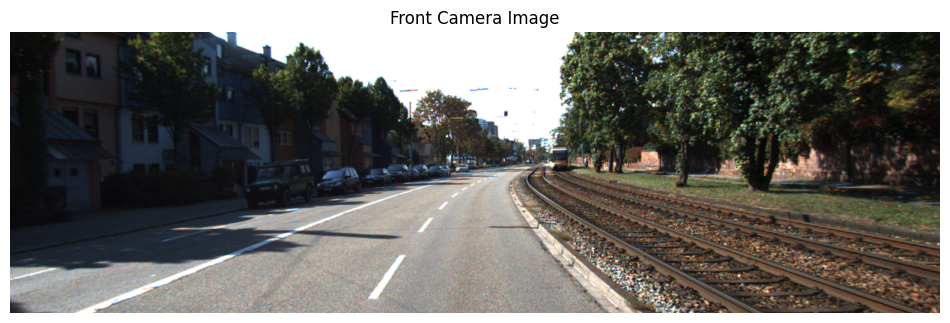

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Path to first image
img_path = os.path.join(BASE_DIR, 'image_02', 'data', '0000000000.png')

# Read and convert to RGB
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.title("Front Camera Image")
plt.axis('off')
plt.show()


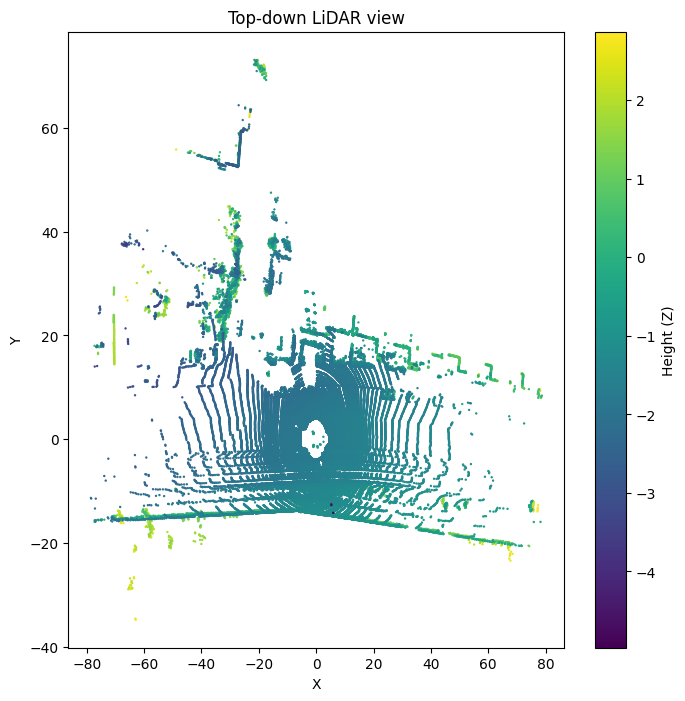

In [ ]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# Load LiDAR points
velo_path = os.path.join(BASE_DIR, 'velodyne_points', 'data', '0000000000.bin')
points = np.fromfile(velo_path, dtype=np.float32).reshape(-1, 4)

# Create Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:, :3])

# Convert to numpy for plotting
xyz = np.asarray(pcd.points)

# Simple top-down view
plt.figure(figsize=(8,8))
plt.scatter(xyz[:,0], xyz[:,1], s=0.5, c=xyz[:,2], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Top-down LiDAR view')
plt.colorbar(label='Height (Z)')
plt.show()


In [ ]:
import pandas as pd
import glob

# Get first OXTS file
oxts_files = sorted(glob.glob(os.path.join(BASE_DIR, 'oxts', 'data', '*.txt')))
oxts_path = oxts_files[0]

# Load as DataFrame
oxts_data = pd.read_csv(oxts_path, sep=' ', header=None)
oxts_data.columns = ['lat', 'lon', 'alt', 'roll', 'pitch', 'yaw',
                     'vn', 've', 'vf', 'vl', 'vu',
                     'ax', 'ay', 'az', 'af', 'al', 'au',
                     'wx', 'wy', 'wz', 'wf', 'wl', 'wu',
                     'pos_accuracy', 'vel_accuracy', 'navstat',
                     'numsats', 'posmode', 'velmode', 'orimode']

print(oxts_data.head())


         lat       lon         alt      roll    pitch       yaw        vn  \
0  49.015004  8.434297  116.430328  0.035752  0.00903 -2.608707 -6.811441   

          ve         vf        vl  ...        wf        wl        wu  \
0 -11.275642  13.172717 -0.124753  ...  0.008902 -0.022495 -0.018809   

   pos_accuracy  vel_accuracy  navstat  numsats  posmode  velmode  orimode  
0      0.027659      0.012728        4       11        6        6        6  

[1 rows x 30 columns]


In [ ]:
# LiDAR features: mean & std of distances
lidar_distances = np.linalg.norm(points[:, :3], axis=1)
lidar_mean = np.mean(lidar_distances)
lidar_std = np.std(lidar_distances)

# OXTS features: velocity
speed = oxts_data['vf'].values[0]

# Combine into one feature vector
feature_vector = np.array([lidar_mean, lidar_std, speed])
print("Feature vector:", feature_vector)


Feature vector: [15.02280235 11.83718109 13.17271666]


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Simulate 10 frames (for demonstration)
feature_matrix = np.array([feature_vector + np.random.randn(3)*0.1 for _ in range(10)])

# Split across 3 "edge nodes"
edge_nodes = np.array_split(feature_matrix, 3)

local_clusters = []
for i, node_data in enumerate(edge_nodes):
    kmeans = KMeans(n_clusters=2, random_state=42).fit(node_data)
    print(f"\nEdge Node {i+1} local cluster centers:\n", kmeans.cluster_centers_)
    local_clusters.append(kmeans.cluster_centers_)

# Global aggregation (simple concatenation for demonstration)
global_clusters = np.vstack(local_clusters)
print("\nGlobal cluster centers (aggregated):\n", global_clusters)



Edge Node 1 local cluster centers:
 [[15.06623429 11.82316065 13.08298463]
 [14.95620941 11.91585603 13.20796877]]

Edge Node 2 local cluster centers:
 [[15.22685883 11.8565709  13.21071742]
 [14.85012981 11.92110413 13.16880246]]

Edge Node 3 local cluster centers:
 [[15.0281335  11.71232331 13.18565547]
 [14.85367791 11.84764233 13.2565371 ]]

Global cluster centers (aggregated):
 [[15.06623429 11.82316065 13.08298463]
 [14.95620941 11.91585603 13.20796877]
 [15.22685883 11.8565709  13.21071742]
 [14.85012981 11.92110413 13.16880246]
 [15.0281335  11.71232331 13.18565547]
 [14.85367791 11.84764233 13.2565371 ]]


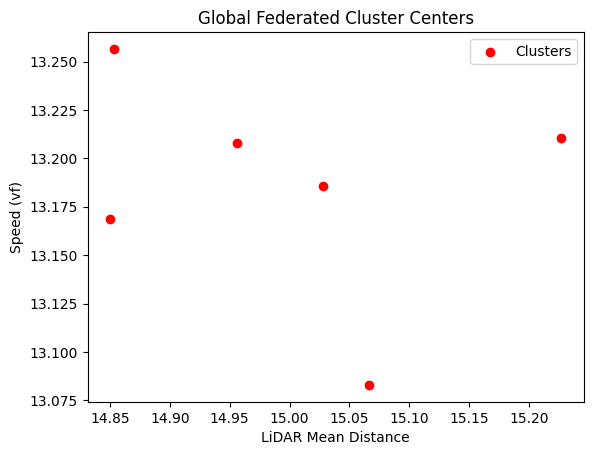

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(global_clusters[:,0], global_clusters[:,2], c='r', label='Clusters')
plt.xlabel('LiDAR Mean Distance')
plt.ylabel('Speed (vf)')
plt.title('Global Federated Cluster Centers')
plt.legend()
plt.show()


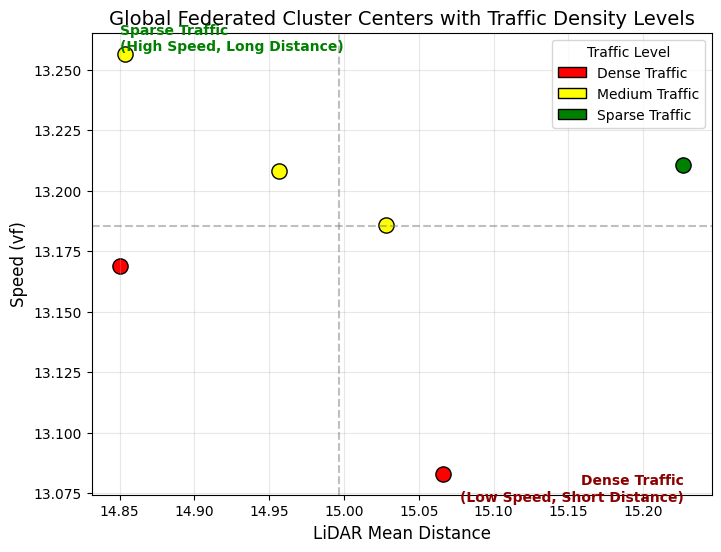

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual array)
# global_clusters = np.array([...])

# Extract values
x = global_clusters[:, 0]  # LiDAR Mean Distance
y = global_clusters[:, 2]  # Speed (vf)

# Normalize to compute a "traffic density" score (lower distance & speed = denser)
density_score = (x - np.min(x)) / (np.max(x) - np.min(x)) + (y - np.min(y)) / (np.max(y) - np.min(y))
density_score = 1 - (density_score / np.max(density_score))  # invert: higher score = denser traffic

# Assign colors based on density levels
colors = []
for score in density_score:
    if score > 0.66:
        colors.append('red')      # dense traffic
    elif score > 0.33:
        colors.append('yellow')   # medium traffic
    else:
        colors.append('green')    # sparse traffic

plt.figure(figsize=(8,6))

# Scatter plot with colors
for i in range(len(x)):
    plt.scatter(x[i], y[i], color=colors[i], s=120, edgecolor='black')

# Dashed mean lines for guidance
plt.axhline(y=np.mean(y), color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=np.mean(x), color='gray', linestyle='--', alpha=0.5)

# Annotate regions
plt.text(x.min(), y.max(), 'Sparse Traffic\n(High Speed, Long Distance)',
         fontsize=10, color='green', ha='left', va='bottom', fontweight='bold')

plt.text(x.max(), y.min(), 'Dense Traffic\n(Low Speed, Short Distance)',
         fontsize=10, color='darkred', ha='right', va='top', fontweight='bold')

# Labels and aesthetics
plt.xlabel('LiDAR Mean Distance', fontsize=12)
plt.ylabel('Speed (vf)', fontsize=12)
plt.title('Global Federated Cluster Centers with Traffic Density Levels', fontsize=14)
plt.grid(alpha=0.3)

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Dense Traffic'),
    Patch(facecolor='yellow', edgecolor='black', label='Medium Traffic'),
    Patch(facecolor='green', edgecolor='black', label='Sparse Traffic')
]
plt.legend(handles=legend_elements, title='Traffic Level')

plt.show()


In [ ]:
# ---- Additional Feature Insights ----
import numpy as np

# Compute new LiDAR metrics
lidar_height_std = np.std(points[:, 2])
lidar_density = len(points) / (np.pi * (np.max(np.linalg.norm(points[:, :3], axis=1))**2))

# Vehicle acceleration magnitude from OXTS
accel_mag = np.sqrt(
    oxts_data['ax'].values[0]**2 +
    oxts_data['ay'].values[0]**2 +
    oxts_data['az'].values[0]**2
)

print(f"LiDAR Height Std: {lidar_height_std:.4f}")
print(f"LiDAR Density: {lidar_density:.4f}")
print(f"Acceleration Magnitude: {accel_mag:.4f}")


LiDAR Height Std: 0.8241
LiDAR Density: 6.0492
Acceleration Magnitude: 10.2197


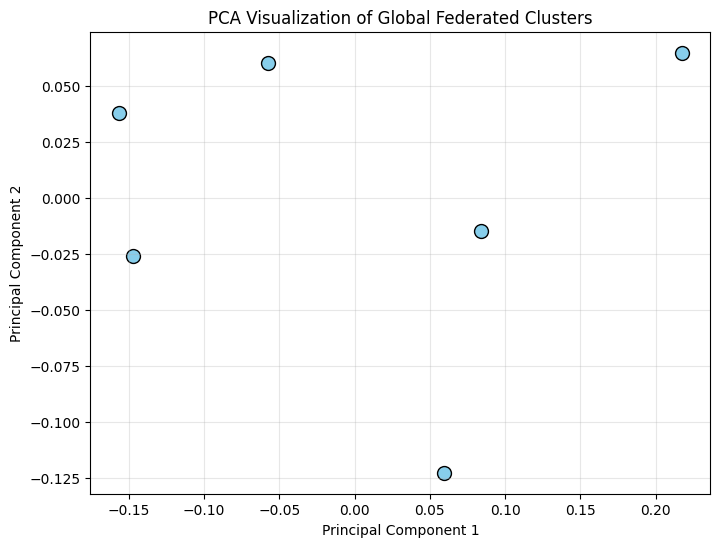

In [ ]:
# ---- PCA Visualization of Clusters ----
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Run PCA on global clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(global_clusters)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c='skyblue', edgecolor='black', s=100)
plt.title('PCA Visualization of Global Federated Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# ---- Weighted Federated Aggregation ----
weights = [len(node_data) for node_data in edge_nodes]
total_weight = sum(weights)

weighted_clusters = np.vstack([
    local_clusters[i] * (weights[i] / total_weight)
    for i in range(len(local_clusters))
])

global_cluster_center = np.mean(weighted_clusters, axis=0)
print("Weighted Global Cluster Center:\n", global_cluster_center)


Weighted Global Cluster Center:
 [4.99943625 3.94948315 4.39381585]


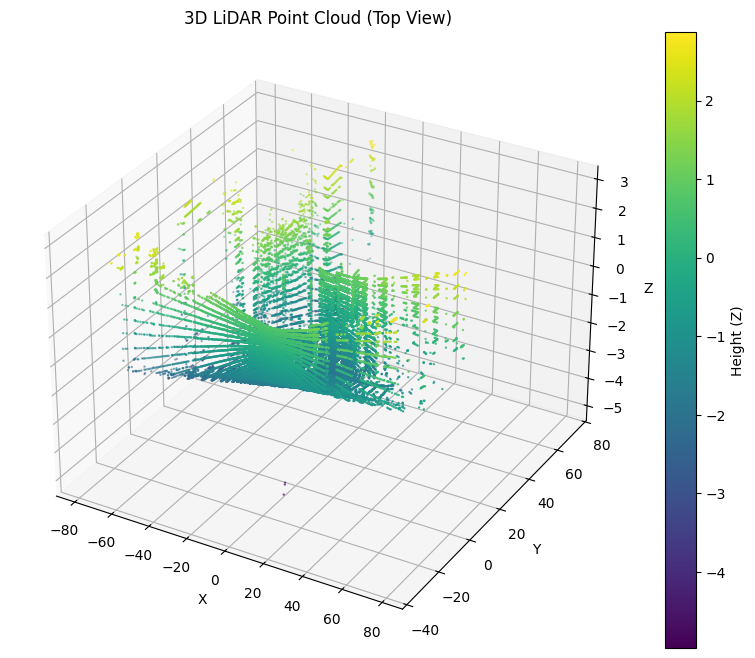

In [ ]:
# ---- 3D LiDAR Visualization (Colab-Compatible) ----
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Use the same points array from before
xyz = points[:, :3]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot (colored by height)
p = ax.scatter(
    xyz[:,0], xyz[:,1], xyz[:,2],
    c=xyz[:,2], cmap='viridis', s=0.5
)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D LiDAR Point Cloud (Top View)')
fig.colorbar(p, label='Height (Z)')
plt.show()


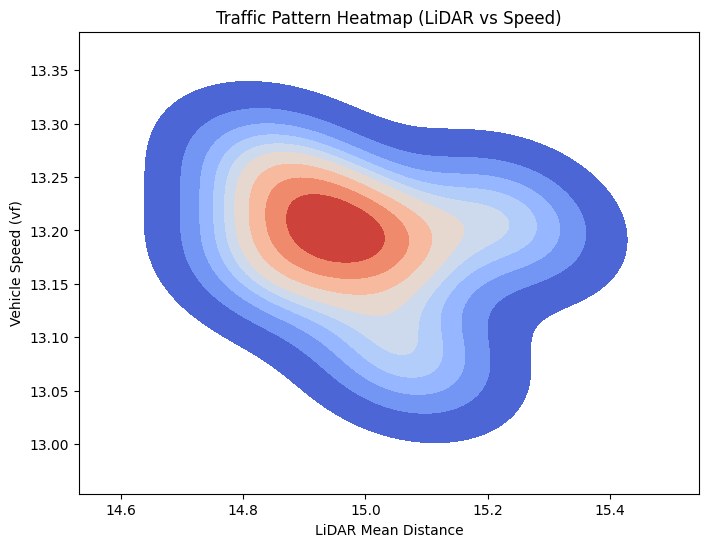

In [ ]:
# ---- Traffic Pattern Heatmap ----
import seaborn as sns
import pandas as pd

data_df = pd.DataFrame({
    'LiDAR_Mean': global_clusters[:,0],
    'Speed': global_clusters[:,2],
    'Density_Score': density_score
})

plt.figure(figsize=(8,6))
sns.kdeplot(
    data=data_df,
    x='LiDAR_Mean',
    y='Speed',
    fill=True,
    cmap='coolwarm',
    thresh=0.05,
)
plt.title('Traffic Pattern Heatmap (LiDAR vs Speed)')
plt.xlabel('LiDAR Mean Distance')
plt.ylabel('Vehicle Speed (vf)')
plt.show()


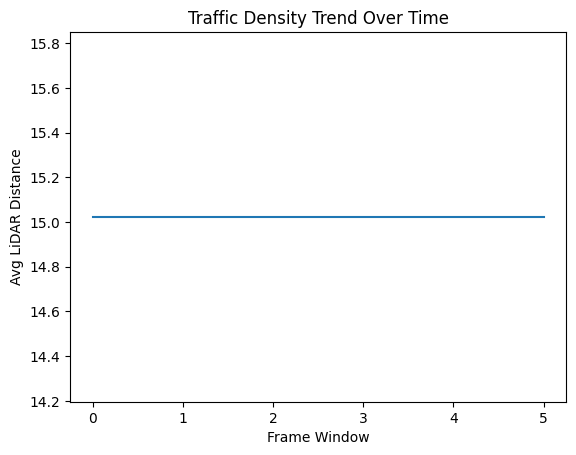

In [ ]:
# Example: Compute moving average of LiDAR mean distances
window = 5
moving_avg = np.convolve([np.mean(np.linalg.norm(points[:, :3], axis=1)) for _ in range(10)],
                         np.ones(window)/window, mode='valid')
plt.plot(moving_avg)
plt.title('Traffic Density Trend Over Time')
plt.xlabel('Frame Window')
plt.ylabel('Avg LiDAR Distance')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

labels = (density_score > 0.66).astype(int)  # pseudo-labels from clusters
clf = RandomForestClassifier(random_state=42)
clf.fit(global_clusters, labels)
print("Classifier trained to recognize traffic density patterns.")


Classifier trained to recognize traffic density patterns.


In [ ]:
noisy_nodes = [node + np.random.normal(0, 0.05, node.shape) for node in edge_nodes]


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# --- Cluster summary (your current 3 features) ---
cluster_summary = pd.DataFrame(global_clusters, columns=['LiDAR_Mean','LiDAR_Std','Speed'])
cluster_summary['Cluster_ID'] = ['Cluster_'+str(i+1) for i in range(len(cluster_summary))]

# --- PCA plot ---
fig_pca = px.scatter(
    pca_df, x='PC1', y='PC2', color='Cluster',
    title='PCA 2D Projection of Global Clusters'
)
fig_pca.show()

# --- 3D LiDAR plot ---
xyz_sample = xyz[::50]
lidar_df = pd.DataFrame(xyz_sample, columns=['X','Y','Z'])
lidar_df['Height'] = lidar_df['Z']

fig_3d = px.scatter_3d(
    lidar_df, x='X', y='Y', z='Z',
    color='Height', color_continuous_scale='Viridis',
    title='3D LiDAR Point Cloud'
)
fig_3d.show()

# --- Cluster summary table ---
table_fig = go.Figure(data=[go.Table(
    header=dict(values=list(cluster_summary.columns),
                fill_color='lightgrey',
                align='left'),
    cells=dict(values=[cluster_summary[col] for col in cluster_summary.columns],
               fill_color='white',
               align='left'))
])
table_fig.show()
